About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

Dataset

Link: Dataset_link

(After clicking on the above link, you can download the files by right-clicking on the page and clicking on "Save As", then naming the file as per your wish, with .csv as the extension.)

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show
Type: Identifier - A Movie or TV Show
Title: Title of the Movie / Tv Show
Director: Director of the Movie
Cast: Actors involved in the movie/show
Country: Country where the movie/show was produced
Date_added: Date it was added on Netflix
Release_year: Actual Release year of the movie/show
Rating: TV Rating of the movie/show
Duration: Total Duration - in minutes or number of seasons
Listed_in: Genre
Description: The summary description

# 1. Defining Problem Statement and Analysing basic metrics

Problem Statement:

- Analyze the Netflix dataset and generate insights by data visualization.
- These insights/ recommendations will help Netflix decide what kind of shows/ movies should be produced which would increase    its viewership across globe.
- Data is present in spreadsheet format and does not make sense until it is cleaned and analysed.

In [2]:
# Analysing basic Metrics:

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df=pd.read_csv('C:/Users/samaksharma/Downloads/Scaler_DS/06_Python_DAV_Python Libraries/Project_Netflix/netflix.csv')

In [138]:
# Basic details about the dataset.
# This depicts that there are 8807 records (rows) in the dataset and 12 columns as seen in output
# Columns like 'director','cast','country','date_added','rating','duration' have null values as well which will be taken
# care during data cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [139]:
# Below output is just to get a glimpse of data stored in dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


High Level analysis of the columns below:

In [140]:
# There are 2 kinds of content on Netflix i.e. Movie and TV Show.
# As seen in the below figure, we have 43% more movies than TV shows.
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [141]:
# There are 4528 directors who have directed the content. Though this figure is inaccurate and will be reduced because
# there are some movie/ show which is directed by multiple directors. We will be unnesting the director column
# to derive the exact count and number of movies/ shows directed by them.
# As we can see below Rajiv Chilaka and Raul Campos/ Jan Suter have created most number of movies/ shows on Netflix
print("Total number of unique directors:", df['director'].nunique())
print(df['director'].value_counts())

Total number of unique directors: 4528
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64


In [142]:
# We have some content that is produced in a single country and we also have some content that is produced
# across multiple countries.
# United States and India lead the way in producing maximum content on Netflix.
print(df['country'].value_counts())

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                200
                                          ... 
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
Canada, Norway                               1
Finland, Germany, Belgium                    1
United Arab Emirates, Jordan                 1
Name: country, Length: 746, dtype: int64


In [143]:
# We have content on Netflix that was produced in 1925 till 2021.
# Most of the content was released in year 2018,2017, 2019 and 2020
# We also observe that in 2021, there were only 592 movies/ shows released due to the pandemic in 2020 and 2021.
print("Release year of the oldest show:", df['release_year'].min())
print("Release year of the latest show:", df['release_year'].max())
print(df['release_year'].value_counts())
print("Number of shows/ movies released in 2021:", df.loc[df['release_year']==2021,['show_id']].count())

Release year of the oldest show: 1925
Release year of the latest show: 2021
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64
Number of shows/ movies released in 2021: show_id    592
dtype: int64


In [144]:
# There are 14 kind of rating that are given to the movie/ shows.
# Bottom 3 (74 min,84 min and 66 min) is bad data that should be part of duration column.
# Maximum content present on netflix belongs to TV-MA (unsuitable for children below 17) and 
# TV-14(unsuitable for children below 14)
print("Total kinds of rating:", df['rating'].nunique())
print(df['rating'].value_counts())

Total kinds of rating: 17
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


In [145]:
# As seen in the dataset, movies will have the duration in minutes and TV shows will have the duration in seasons

In [146]:
# Most of the content on Netflix has a genre of Dramas, International Movies followed by
# Documentaries or Stand-Up Comedy
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [147]:
#Observations on the shape of data:

# In the dataset, we have 8807 record and 12 columns
print("Rows in the original dataset:", df.shape[0])
print("Columns in the original dataset:", df.shape[1])

Rows in the original dataset: 8807
Columns in the original dataset: 12


In [148]:
# As part of data cleaning, we'll check if we have any duplicate records based on the title
df.loc[df.duplicated(subset=['title'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5964,s5965,TV Show,9-Feb,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


In [149]:
# We find 3 such records and then delete these duplicate records permanently from the analysis
df.drop_duplicates(subset=['type','title','director','country','date_added','release_year'],keep="first",inplace=True)

# Meanwhile, also resetting the index to ensure prpoer analysis
df.reset_index(drop=True,inplace=True)


In [150]:
# Final shape of data has now decreased to record count as 8804 and column count as 12
print("Rows in the new dataset:", df.shape[0])
print("Columns in the new dataset:", df.shape[1])

Rows in the new dataset: 8804
Columns in the new dataset: 12


In [151]:
# Data Types of all atributes
# Apart from release_year, all the fields have an object datatype. Release_year's datatype is marked as int
# We will have to change the datatype of date_added to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6171 non-null   object
 4   cast          7979 non-null   object
 5   country       7974 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8801 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.5+ KB


In [211]:
# Missing Value Detection and filling them with applicable values
# From the dataset info, it is observed that director, cast, country, date_added, release_year, rating and duration
# have null values

In [152]:
# Cleaning column 'Director'
print("Record count with director name not available:", df['director'].isna().sum())
df['director']=df['director'].fillna('Director N/A')

Record count with director name not available: 2633


In [153]:
# Cleaning column 'Cast'
print("Record count with cast list not available:", df['cast'].isna().sum())
df['cast']=df['cast'].fillna('Cast N/A')

Record count with cast list not available: 825


In [154]:
# Cleaning column 'Country'
print("Record count with country name not available:", df['country'].isna().sum())
df['country']=df['country'].fillna('Country N/A')

Record count with country name not available: 830


In [155]:
# For date_added field, we have 10 records which are null values. We will calculate the mean difference between the
# shows added on Netflix and its release year and then populate the mean date in these records
# Also, the format for date field in some records is DD-MMM-YY (e.g. 25-Sep-2021) and in some records it is 
# Month DD, YYYY (e.g. September 16, 2018). We will reformat this date_added field to YYYY-MM-DD
print("Record count with date_added not available:", df['date_added'].isna().sum())

Record count with date_added not available: 10


In [156]:
#Date format changed for date_added
df['nw_date']=pd.to_datetime(df['date_added'])
df['date_added']=df['nw_date'].dt.date
df.drop(columns={'nw_date'},inplace=True)

# Calculate the difference of release year and date_added (year)
# Then calculate the year mean of the difference which comes out to 5 in this case
df['yr']=(df['date_added'].astype('str')).str.split('-').apply(lambda x:x[0])
df=df.loc[df['yr']!='NaT']
((df['yr'].astype(int))-df['release_year']).mean().round(0)
df.drop(columns={'yr'},inplace=True)

# Add this year mean value (5) to release year and then update the date_added 
# as (release_year+5)-01-01 (first day of the year)
# Convert the date_added column back to date
df['temp_r_yr']=(df['release_year']+5).astype(str)
df['date_added']=df['date_added'].astype(str)
df['date_added']=df['date_added'].fillna(df['temp_r_yr']+'-1'+'-1')
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added']=(df['date_added']).dt.date
df.drop(columns={'temp_r_yr'},inplace=True)

In [157]:
df['date_added']

0       2021-09-25
1       2021-09-24
2       2021-09-24
3       2021-09-24
4       2021-09-24
           ...    
8799    2019-11-20
8800    2019-07-01
8801    2019-11-01
8802    2020-01-11
8803    2019-03-02
Name: date_added, Length: 8794, dtype: object

In [158]:
# We also found that 3 records in 'Ratings' have values like 74 min, 84 min, 66 min and duration column is empty for these.
# Thereby, we are assuming that these values are incorrectly populated in 'Rating' column.
# We will shift these values to 'duration' column and move spaces to 'rating' column
df['duration']=df.apply(lambda x: x['rating'] if x['director']== 'Louis C.K.' else x['duration'],axis=1)
df['rating']=df.apply(lambda x: 'Rating N/A' if x['director']== 'Louis C.K.' else x['rating'],axis=1)
df['rating']=df['rating'].fillna('Rating N/A')

In [159]:
# We will quickly check if we have any null values available
# By the given output, we can confirm all missing values are handled
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.1+ KB


In [160]:
# Statistical Summary

# Since we have just 1 integer column, below are the statistics for that field
# 1925 is the year in which first movie was release and the lastest movie was released in 2021
# As seen with the % ratio, majority of the movie/ tv shows are released after 2010
df.describe().round(0)

,release_year
count,8794.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [161]:
# For all the remaining fields, below is the summary
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8794,8794,8794,8794,8794,8794,8794,8794,8794,8794,8794
unique,8794,2,8794,4529,7683,747,1714,15,220,513,8765
top,s1,Movie,Dick Johnson Is Dead,Director N/A,Cast N/A,United States,2020-01-01,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6129,1,2623,825,2812,110,3205,1792,362,4


# 3. Non-Graphical Analysis: Value counts and unique attributes

In [162]:
# There are 2 kinds of content on Netflix i.e. Movie and TV Show.
# As seen in the below figure, we have 43% more movies than TV shows.
df['type'].value_counts()

Movie      6129
TV Show    2665
Name: type, dtype: int64

In [163]:
# There are 8794 movie/ TV shows on Netflix.

print("Total movie/ shows present on Netflix:", df['title'].nunique())

Total movie/ shows present on Netflix: 8794


In [164]:
# As seen in point 1, we have 4528 directors in the dataset. Though, for some of the records we have 2 or more directors
# directing the show.
# Therefore, we will be unnesting the column 'director' and store this in a separate dataframe

# Create a separate unnested dataframe
df_unnest_dir=df.copy()

# Unnest the column 'director' and add them in separate rows
df_unnest_dir['director']=df_unnest_dir['director'].str.split(', ')
df_unnest_dir=df_unnest_dir.explode('director')
df_unnest_dir.reset_index(drop=True,inplace=True)

# As seen, we have 4993 unique directors, of which Rajiv Chilaka and Jan Suter have directed the most content
print("Number of unique directors:", (df_unnest_dir['director'].nunique()-1))
df_unnest_dir['director'].value_counts()

Number of unique directors: 4993


Director N/A      2623
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

In [165]:
# For some of the records we have 2 or more actors in the cast list.
# Therefore, we will be unnesting the column 'cast' and store this in a separate dataframe

# Create a separate unnested dataframe
df_unnest_cast=df.copy()

# Unnest the column 'cast' and add them in separate rows
df_unnest_cast['cast']=df_unnest_cast['cast'].str.split(', ')
df_unnest_cast=df_unnest_cast.explode('cast')
df_unnest_cast.reset_index(drop=True,inplace=True)

# As seen, we have 36404 unique actors, of which Anupam Kher has acted in 43 of the movies/ TV shows
print("Number of unique actors:", df_unnest_cast['cast'].nunique())
df_unnest_cast['cast'].value_counts()

Number of unique actors: 36404


Cast N/A                 825
Anupam Kher               43
Shah Rukh Khan            35
Julie Tejwani             33
Takahiro Sakurai          32
                        ... 
Juan Gil Navarro           1
Carlos Belloso             1
Park Se-jin                1
Hyun Bong-sik              1
Chittaranjan Tripathy      1
Name: cast, Length: 36404, dtype: int64

In [166]:
# As seen in point 1, we have 746 unique countries in the dataset. Though, for some of the records we have 2 or more
# countries where the show was produced.
# Therefore, we will be unnesting the column 'country' and store this in a separate dataframe

# Create a separate unnested dataframe
df_unnest_cnty=df.copy()

# Unnest the column 'country' and add them in separate rows
df_unnest_cnty['country']=df_unnest_cnty['country'].str.split(', ')
df_unnest_cnty=df_unnest_cnty.explode('country')
df_unnest_cnty.reset_index(drop=True,inplace=True)

# As seen, we have 126 unique countries, of which 3682 and 1045 shows were produced in US and India respectively
print("Number of unique countries:", (df_unnest_cnty['country'].nunique()-1))
df_unnest_cnty['country'].value_counts()

Number of unique countries: 126


United States     3682
India             1045
Country N/A        829
United Kingdom     803
Canada             445
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

In [167]:
# We need to analyse the date_added column and see the number of movies/ TV shows that were added in respective years
# As seen, most of the shows were added to Netflix in 2019 and 2020.
# Netflix started putting up the content in 2008

(pd.to_datetime(df['date_added']).dt.year).value_counts()

2019    2014
2020    1879
2018    1648
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: int64

In [168]:
# We have content on Netflix that was produced in 1925 till 2021.
# Most of the content was released in year 2018,2017, 2019 and 2020

print("Release year of the oldest show:", df['release_year'].min())
print("Release year of the latest show:", df['release_year'].max())
print(df['release_year'].value_counts())
print("Number of shows/ movies released in 2021:", df.loc[df['release_year']==2021,['show_id']].count())

Release year of the oldest show: 1925
Release year of the latest show: 2021
2018    1144
2017    1032
2019    1029
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64
Number of shows/ movies released in 2021: show_id    592
dtype: int64


In [169]:
# There are 14 kind of rating that are given to the movie/ shows.
# Maximum content present on netflix belongs to TV-MA (unsuitable for children below 17) and 
# TV-14(unsuitable for children below 14)
# There is no data for 7 records which are marked as 'Rating N/A'
print("Total kinds of rating:", (df['rating'].nunique()-1))
print(df['rating'].value_counts())

Total kinds of rating: 14
TV-MA         3205
TV-14         2155
TV-PG          861
R              798
PG-13          490
TV-Y7          333
TV-Y           306
PG             287
TV-G           220
NR              79
G               41
Rating N/A       7
TV-Y7-FV         6
NC-17            3
UR               3
Name: rating, dtype: int64


In [170]:
# As seen in the dataset, movies will have the duration in minutes and TV shows will have the duration in seasons
# By analysing the data, we observe that average duration for a movie on Netflix is 100 minutes
# and average number for TV shows is 2 seasons.

d1=df.loc[df['type']=="Movie"]
d1['duration']=d1['duration'].str.split(' ').apply(lambda x: x[0])
print("The average duration of Movies on netflix is:", (d1['duration'].astype(int)).mean().round(0)," minutes.")
print("The maximum duration of a movie is",(d1['duration'].astype(int)).max()," minutes.")
print("The minimum duration of a movie is",(d1['duration'].astype(int)).min()," minutes.")
print("\n")

d2=df.loc[df['type']=="TV Show"]
d2['duration']=d2['duration'].str.split(' ').apply(lambda x: x[0])
print("The average number of seasons for TV shows on netflix is:", (d2['duration'].astype(int)).mean().round(0))
print("The maximum number of seasons for a TV show is", (d2['duration'].astype(int)).max())
print("The minimum number of seasons for a TV show is", (d2['duration'].astype(int)).min())

The average duration of Movies on netflix is: 100.0  minutes.
The maximum duration of a movie is 312  minutes.
The minimum duration of a movie is 3  minutes.


The average number of seasons for TV shows on netflix is: 2.0
The maximum number of seasons for a TV show is 17
The minimum number of seasons for a TV show is 1


In [171]:
# Most of the content on Netflix has a genre of Dramas, International Movies followed by
# Documentaries and Stand-Up Comedy
print("There are", df['listed_in'].nunique(), "genres available on Netflix")
df['listed_in'].value_counts()

There are 513 genres available on Netflix


Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

# 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

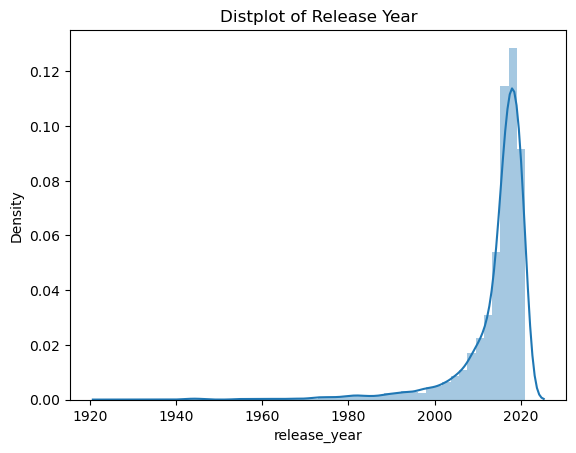

In [172]:
# Generate distplot to capture the release year of movies
# Movies released after 2000 has increased exponentially and the peak reaching in 2018 and 2019
plt.title("Distplot of Release Year")
sns.distplot(df['release_year'])
plt.show()

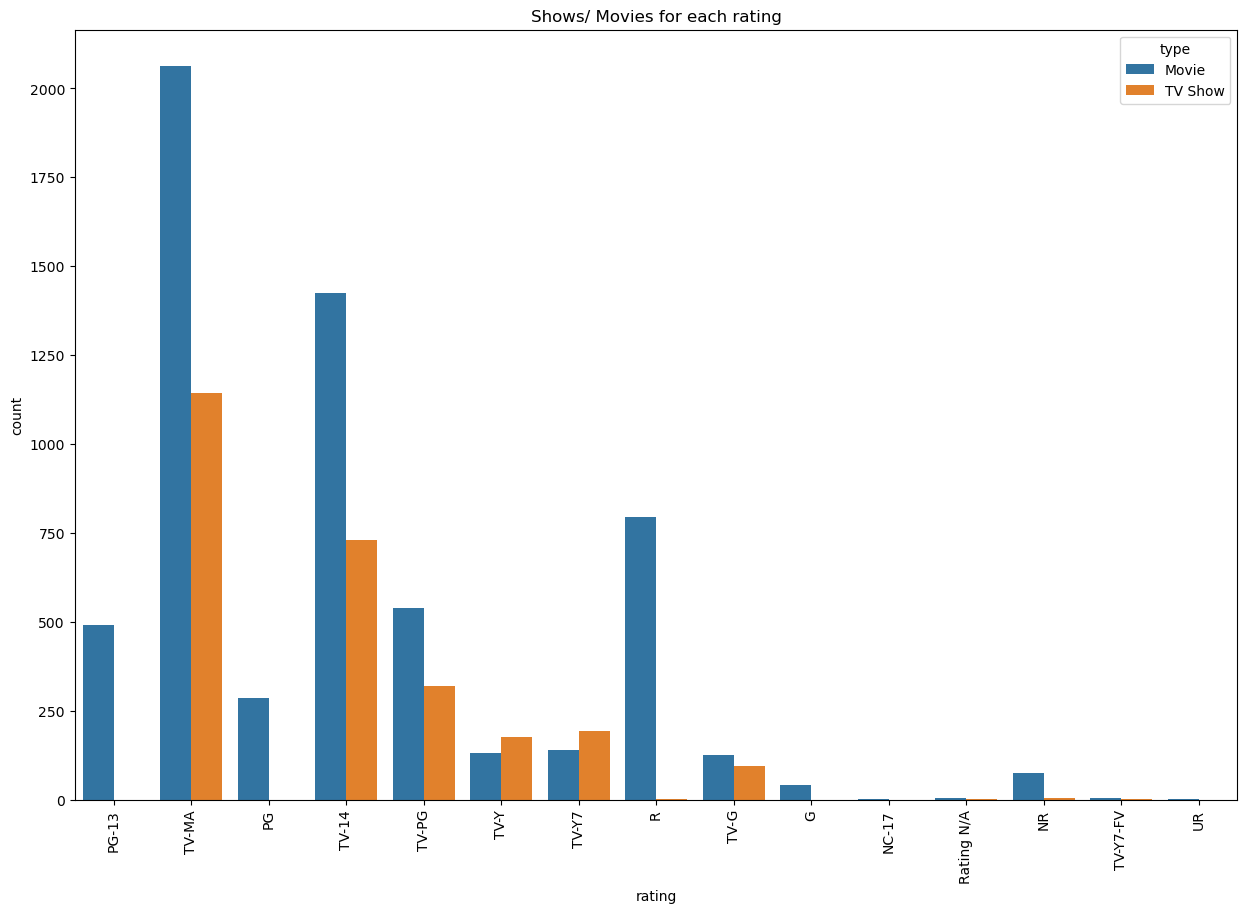

In [173]:
# Generate countplot to capture the number of movies/ shows for each rating
# Most of the content on Netflix has TV-MA rating followed by TV-14
# There are no TV shows that have PG or PG-13 rating (where Parental Guidance is suggested)
plt.figure(figsize=(15,10))
plt.title("Shows/ Movies for each rating")
sns.countplot(x="rating",hue="type",data=df)
plt.xticks(rotation=90)
plt.show()

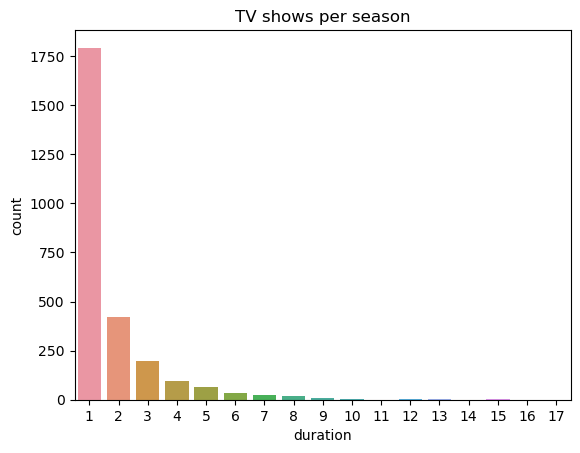

In [174]:
# Generate countplot to capture the number of TV shows on baisi of seasons
# Observed that most of the TV shows have 1 or 2 seasons
seasons_order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.title("TV shows per season")
sns.countplot(x="duration",data=d2,order=seasons_order)
plt.show()

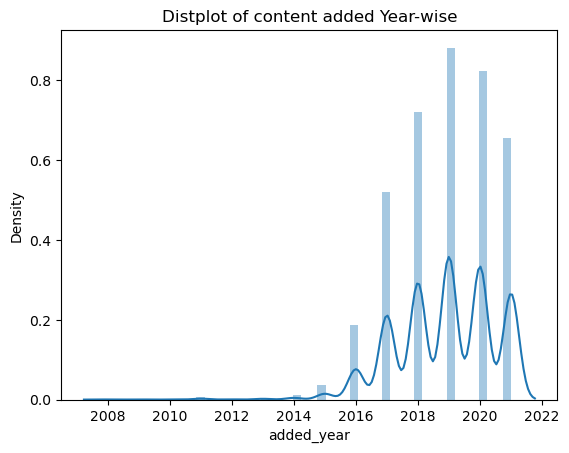

In [175]:
# Generate distplot to capture the year in which content was added on Netflix
# Most of the movies/ Shows were added after 2017. There was a fall in 2021
plt.title("Distplot of content added Year-wise")
df_temp=df.copy()
df_temp['added_year']=pd.to_datetime(df['date_added']).dt.year
sns.distplot(df_temp['added_year'])
plt.show()

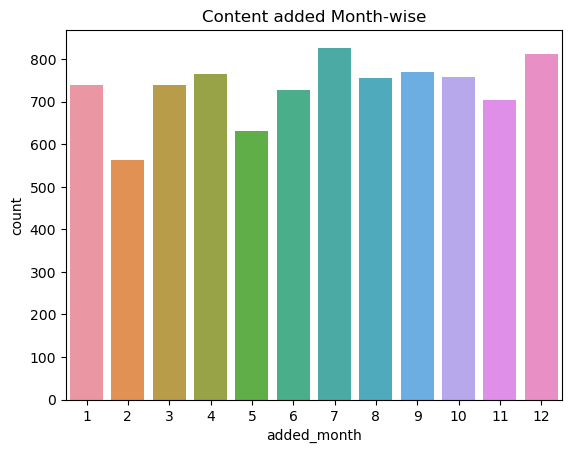

In [176]:
# Generate barplot to capture the month in which content was added on Netflix
# Most of the movies/ Shows were added in July followed by December i.e. holiday season
# Least content is added in the month of February
plt.title("Content added Month-wise")
df_temp['added_month']=pd.to_datetime(df_temp['date_added']).dt.month
sns.countplot(x='added_month',data=df_temp)
plt.show()

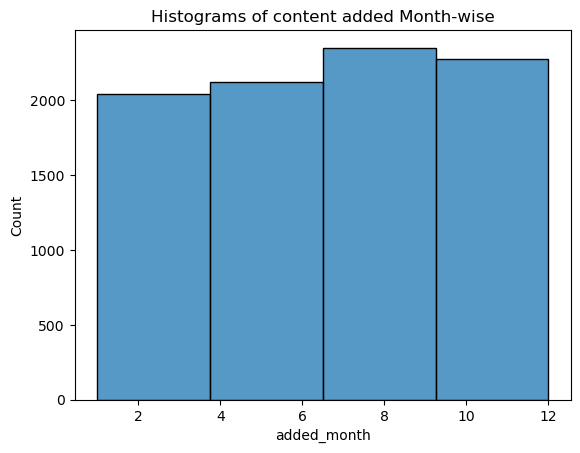

In [177]:
# Generate histigram to capture the month in which content was added on Netflix
# Most of the movies/ Shows were added 3rd quarter followed by the last quarter

plt.title("Histograms of content added Month-wise")
df_temp['added_month']=pd.to_datetime(df['date_added']).dt.month
sns.histplot(df_temp['added_month'],bins=4)
plt.show()

# 4.2 For categorical variable(s): Bivariate Analysis

In [178]:
#Calculate the top 10 countries which produce the most content
top_countries=df_unnest_cnty['country'].value_counts().index[0:2]
top_countries=top_countries.append(df_unnest_cnty['country'].value_counts().index[3:11])
top_countries
top10_df=df_unnest_cnty.loc[(df_unnest_cnty['country'].isin(top_countries))]

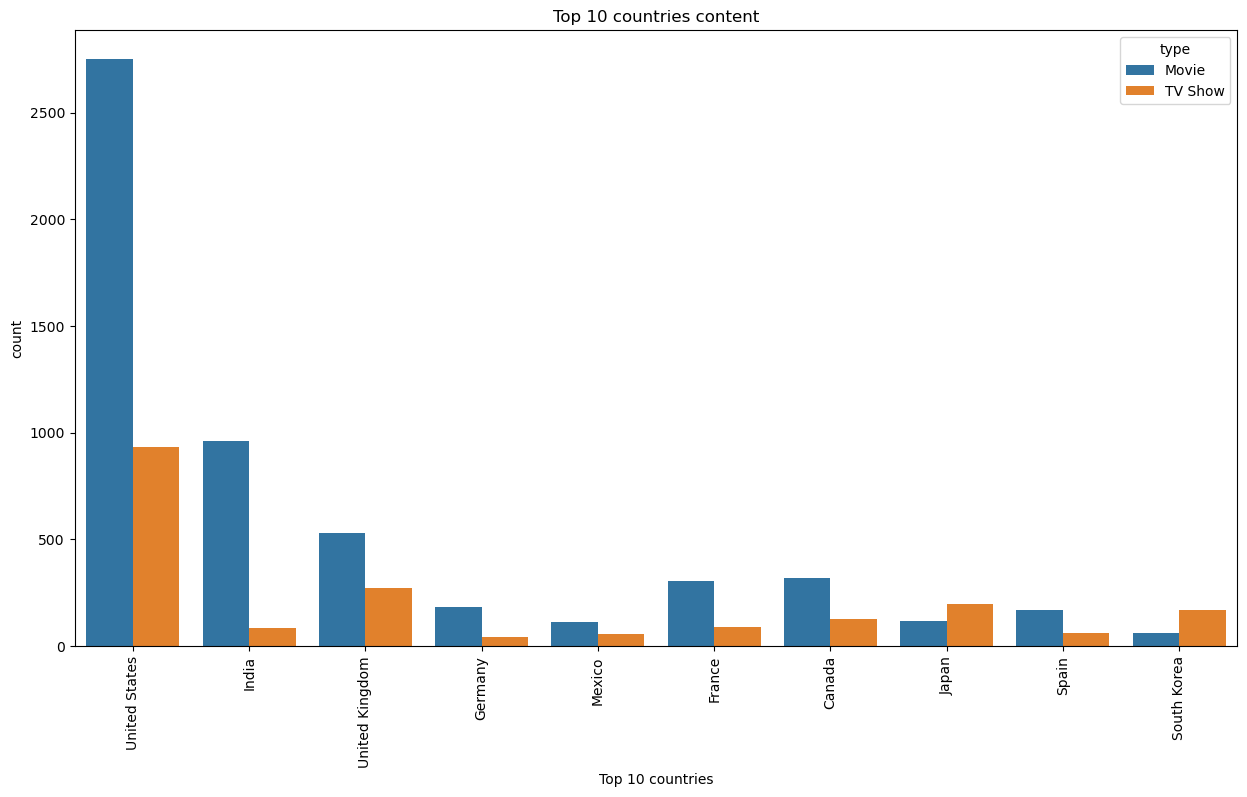

In [179]:
#Generate countplot to analyse the type of content produced by top 10 countries
plt.figure(figsize=(15,8))
plt.title("Top 10 countries content")
sns.countplot(x="country",hue="type",data=top10_df)
plt.xticks(rotation=90)
plt.xlabel("Top 10 countries")
plt.show()

In [180]:
#Calculate the top 10 genres which produce the most content
top_genres=df['listed_in'].value_counts().index[0:10]
top10_genres=df.loc[(df['listed_in'].isin(top_genres))]

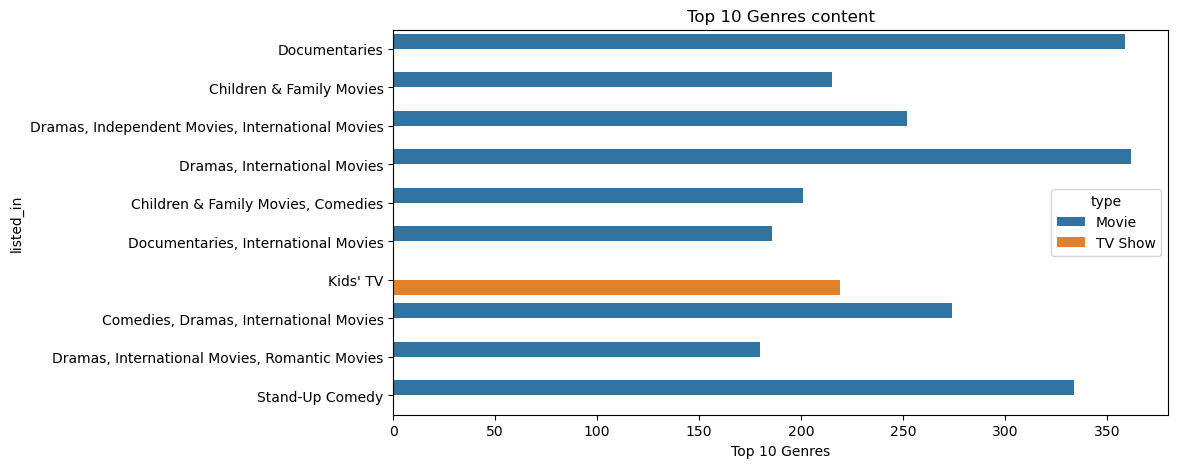

In [181]:
# Generate countplot to analyse the content of top 10 Genres
# 90% of the top 10 Genres are of Movies. Only Kids content is of TV shows.
plt.figure(figsize=(10,5))
plt.title("Top 10 Genres content")
sns.countplot(y="listed_in",hue="type",data=top10_genres)
plt.xlabel("Top 10 Genres")
plt.show()

In [182]:
#Calculate the top 10 countries which produce the most content
top_dir=df_unnest_dir['director'].value_counts().index[1:11]
top10_dir=df_unnest_dir.loc[(df_unnest_dir['director'].isin(top_dir))]

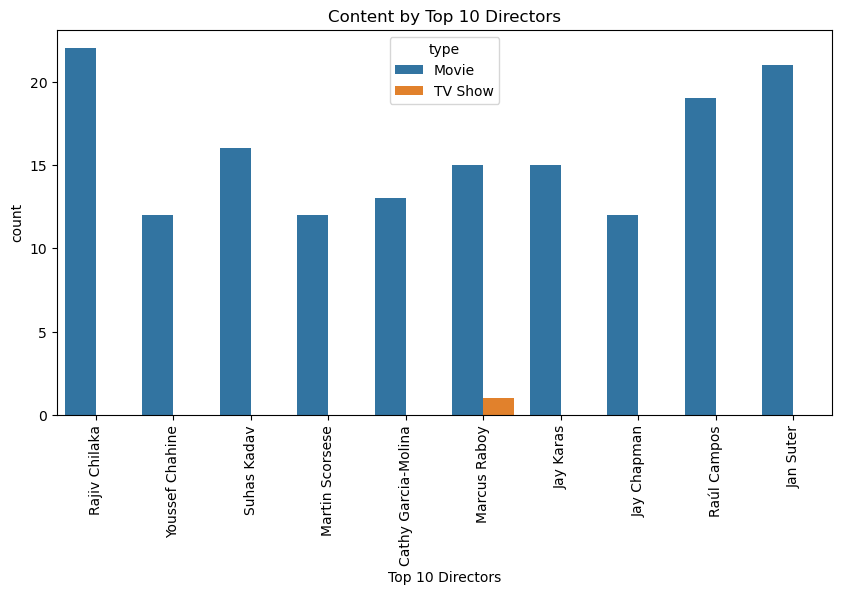

In [183]:
# Generate countplot to analyse the top 10 directors
# 90% of the top 10 directors produce movies on Netflix.
plt.figure(figsize=(10,5))
plt.title("Content by Top 10 Directors")
sns.countplot(x="director",hue="type",data=top10_dir)
plt.xticks(rotation=90)
plt.xlabel("Top 10 Directors")
plt.show()

In [184]:
# Lets calculate the difference in release year vs date added for top 10 countries
top10_df['added_yr']=pd.to_datetime(top10_df['date_added']).dt.year
top10_df['diff_yr']=top10_df['added_yr']-top10_df['release_year']

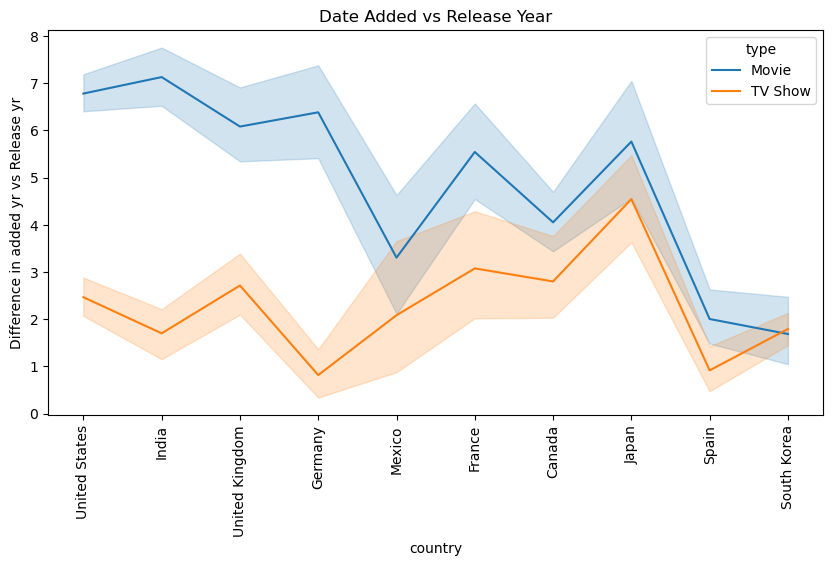

In [185]:
# Plotting a lineplot to compare the mean difference of year added_vs release year for Movies vs TV shows
plt.figure(figsize=(10,5))
plt.title("Date Added vs Release Year")
sns.lineplot(x="country",y="diff_yr",hue="type",data=top10_df,estimator=np.mean)
plt.xticks(rotation=90)
plt.ylabel("Difference in added yr vs Release yr")
plt.show()

# 4.3 For correlation: Heatmaps, Pairplots

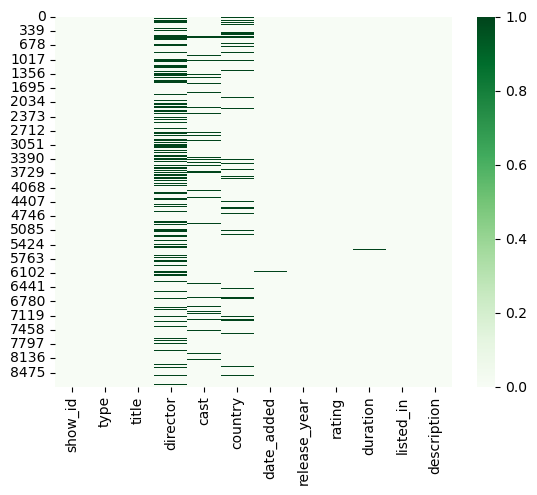

In [186]:
# Generate a heatplot to check for missing values
df_bkup=pd.read_csv('C:/Users/samaksharma/Downloads/Scaler_DS/05_Python_DAV_Python Libraries/Project_Netflix/netflix.csv')
missing_values=df_bkup.isnull()
sns.heatmap(missing_values,cmap="Greens")
plt.show()

In [187]:
# Analyse the top actors in major countries
d1=df_unnest_cast.loc[df_unnest_cast['country']=="United States"]
d1_top10_actor=d1['cast'].value_counts().index[1:11]
d2=d1.loc[(d1['cast'].isin(d1_top10_actor))]

d3=df_unnest_cast.loc[df_unnest_cast['country']=="India"]
d3_top10_actor=d3['cast'].value_counts().index[0:2]
d3_top10_actor=d3_top10_actor.append(d3['cast'].value_counts().index[3:11])
d4=d3.loc[(d3['cast'].isin(d3_top10_actor))]

d5=df_unnest_cast.loc[df_unnest_cast['country']=="United Kingdom"]
d5_top10_actor=d5['cast'].value_counts().index[1:11]
d6=d5.loc[(d5['cast'].isin(d5_top10_actor))]

d7=df_unnest_cast.loc[df_unnest_cast['country']=="Japan"]
d7_top10_actor=d7['cast'].value_counts().index[0:10]
d8=d7.loc[(d7['cast'].isin(d7_top10_actor))]

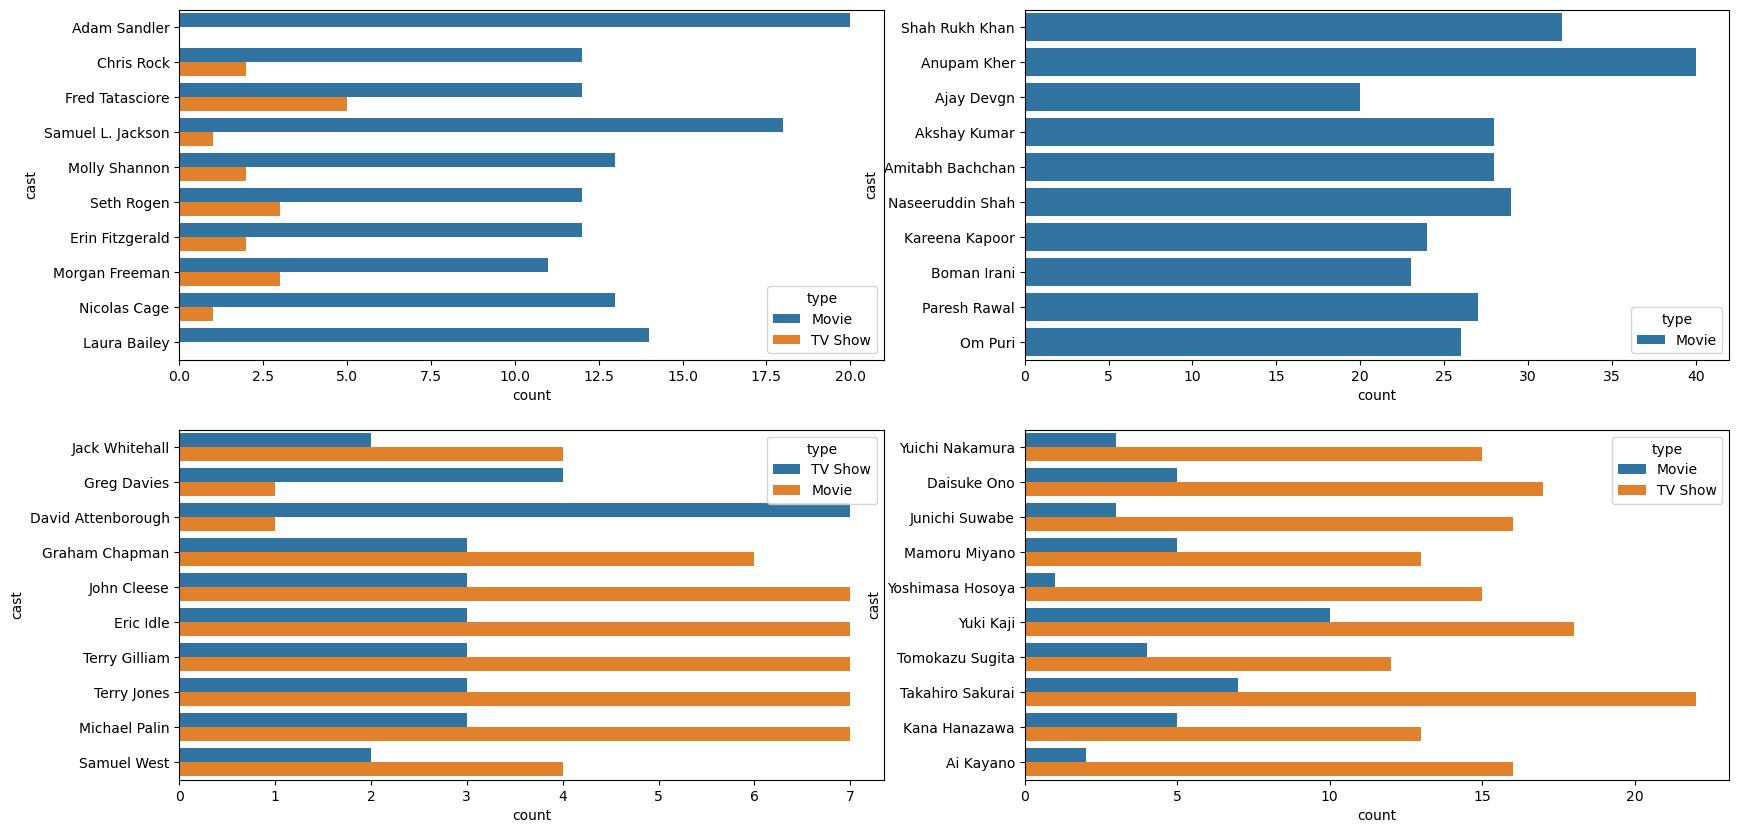

In [188]:
# Create countplot for each of the major countries
plt.figure(figsize=(20,10))
plt.title("Top Actors in Major Countries")

plt.subplot(2,2,1)
plt.ylabel("Actors for US")
sns.countplot(y="cast",data=d2,hue="type")

plt.subplot(2,2,2)
plt.ylabel("Actors for India")
sns.countplot(y="cast",data=d4,hue="type")

plt.subplot(2,2,3)
plt.ylabel("Actors for UK")
sns.countplot(y="cast",data=d6,hue="type")

plt.subplot(2,2,4)
plt.ylabel("Actors for Japan")
sns.countplot(y="cast",data=d8,hue="type")
plt.show()

# 5. Missing Value & Outlier check

In [189]:
# Read the original dataset again and extract info from it
# As observed, director, cast, country, date_added and rating have null values
df_bkup=pd.read_csv('C:/Users/samaksharma/Downloads/Scaler_DS/05_Python_DAV_Python Libraries/Project_Netflix/netflix.csv')
df_bkup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [190]:
# We found that 3 records in 'Ratings' have values like 74 min, 84 min, 66 min and duration column is empty for these.
# Thereby, we are assuming that these values are incorrectly populated in 'Rating' column.
# We will shift these values to 'duration' column and move defaylt value to 'rating' column
df_bkup['duration']=df_bkup.apply(lambda x: x['rating'] if x['director']== 'Louis C.K.' else x['duration'],axis=1)
df_bkup['rating']=df_bkup.apply(lambda x: 'Rating N/A' if x['director']== 'Louis C.K.' else x['rating'],axis=1)
df_bkup['rating']=df_bkup['rating'].fillna('Rating N/A')
df_bkup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [191]:
# Check the null values in director, cast and country column and fill them with a default value
print("Record count with director name not available:", df_bkup['director'].isna().sum())
df_bkup['director']=df_bkup['director'].fillna('Director N/A')

print("Record count with cast list not available:", df_bkup['cast'].isna().sum())
df_bkup['cast']=df_bkup['cast'].fillna('Cast N/A')

print("Record count with country name not available:", df_bkup['country'].isna().sum())
df_bkup['country']=df_bkup['country'].fillna('Country N/A')

df_bkup.info()

Record count with director name not available: 2634
Record count with cast list not available: 825
Record count with country name not available: 831
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [192]:
# date_added column has 10 blank values. We will update the mean value as default
print("Record count with date_added not available:", df_bkup['date_added'].isna().sum())

#Date format changed for date_added
df_bkup['nw_date']=pd.to_datetime(df_bkup['date_added'])
df_bkup['date_added']=df_bkup['nw_date'].dt.date
df_bkup.drop(columns={'nw_date'},inplace=True)

# Calculate the difference of release year and date_added (year)
# Then calculate the year mean of the difference which comes out to 5 in this case
df_bkup['yr']=(df_bkup['date_added'].astype('str')).str.split('-').apply(lambda x:x[0])
df_bkup=df_bkup.loc[df_bkup['yr']!='NaT']
((df_bkup['yr'].astype(int))-df_bkup['release_year']).mean().round(0)
df_bkup.drop(columns={'yr'},inplace=True)

# Add this year mean value (5) to release year and then update the date_added 
# as (release_year+5)-01-01 (first day of the year)
# Convert the date_added column back to date
df_bkup['temp_r_yr']=(df_bkup['release_year']+5).astype(str)
df_bkup['date_added']=df_bkup['date_added'].astype(str)
df_bkup['date_added']=df_bkup['date_added'].fillna(df_bkup['temp_r_yr']+'-1'+'-1')
df_bkup['date_added']=pd.to_datetime(df_bkup['date_added'])
df_bkup['date_added']=(df_bkup['date_added']).dt.date
df_bkup.drop(columns={'temp_r_yr'},inplace=True)

df_bkup.info()

Record count with date_added not available: 10
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8797 non-null   object
 9   duration      8797 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


<Axes: ylabel='duration'>

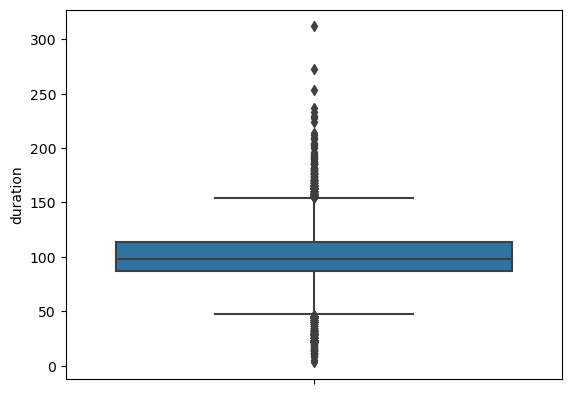

In [193]:
# Boxplot analysis to check if there are outliers in Duration for movies.

d1=df.loc[df['type']=="Movie"]
d1['duration']=d1['duration'].str.split(' ').apply(lambda x: x[0])
d1['duration']=d1['duration'].astype(int)
sns.boxplot(y=d1['duration'])

# 6. Insights based on Non-Graphical and Visual Analysis

# 6.1 Comments on the range of attributes

In [194]:
# show_id - This field is like a unique identifier for the content present on Netflix.
# It ranges from s1 to s8807 (last show id value). Not much useful for analysis

# type - There are 2 values to this attribute. Either it can be 'Movie' or 'TV Show'
# This is very much required for analysis. 61% and 39% movies and TV shows are present on Netflix respectively.

# title - This is the name of the show. Grey's Anatomy is the show with maximum seasons followed by 
# Supernatural, NCIS. Most of these long running bestseller shows are from North America

# director- This attribute holds nested data where 2 or more directors have created the content.
# There are 4933 unique directors of which Rajiv Chilaka, Jan Suter and raul Campos have created maximum
# content i.e. 22, 21 and 19 respectively. For 2623 records, we do not have director information.

# cast- This attribute holds nested data where 2 or more actors have worked in the movie/ shows.
# There are 36404 unique actors of which Anupam Kher, Shah Rukh Khan, Julie Tejwani, Takahiro have acted in maximum
# content i.e. 43,35 and 32 respectively. For 825 records, we do not have cast information. 

# country - This attribute holds nested data where a show was produced in 2 or more countries.
# There are 126 unique countries of which majority of the production is happening in US, India, UK, Canada.
# For 829 records, we do not have country details.

# date_added - This attribute holds the date on which show was added to Netflix. This attributed is converted 
# to a date format (YYYY-MM-DD). The first movie 'To and From New York' was added to Netflix on Jan 1, 2008.
# The latest movie 'Dick Johnson Is Dead' was added on Sep 25, 2021.

# release_year - This year attribute pertains to the year when the movie/ Show was released.
# The first movie was released in 1925 and the dataset has data upto 2021.
# On an average, movie/ TV show is added to Netflix after 5 years of release date which has reduced significantly recently

# rating - There are 14 kinds of ratings assigned to the TV show/ movie.
# Most of the content on Netflix has TV-MA rating followed by TV-14

# duration - For movies, the suration attribute is in minutes and for TV shows it is measured in seasons.
# The shortest movie 'Silent' is of 3 minutes and the longest movie 'Black Mirror: Bandersnatch' duration is  312 mins
# The average duration of a movie is 100 minutes.
# Most of the TV shows have 1 season. Though "Grey's Anatomy" leads the list with 17 seasons as maximum

# listed_in - There are 37 genres available. Most of the content belongs to Drama/ International movies followed
# by Documentaries and Stand up comedy

# Description - This is generic description of the content

# 6.2 Comments on the distribution of the variables and relationship between them

In [195]:
# Netflix's most of the content comprises of movies wrt TV shows.
# Movies will have the duration in minutes while TV shows will have the duration in seasons.
# Most of the long running TV shows are from United States
# As per dataset, the mean difference between release year and the year on which content is added is 5 years. Though there is reduction in this duration after 2015.

# 6.3 Comments for each univariate and bivariate plot

In [196]:
# Distplot to capture the release year of movies
# Comment: Movies released after 2000 has increased exponentially and the peak reaching in 2018 and 2019

# Countplot to capture the number of movies/ shows for each rating
# Comment 1: Most of the content on Netflix has TV-MA rating followed by TV-14
# Comment 2: There are no TV shows that have PG or PG-13 rating (where Parental Guidance is suggested)

# Countplot to capture the number of TV shows on basis of seasons
# Comment: Most of the TV shows have 1 or 2 seasons

# Distplot to capture the year in which content was added on Netflix
# Comment: Most of the movies/ Shows were added after 2017. There was a fall in 2021

# Barplot to capture the month in which content was added on Netflix
# Comment 1: Most of the movies/ Shows were added in July followed by December i.e. holiday season
# Comment 2: Least content is added in the month of February

# Countplot to analyse the type of content produced by top 10 countries
# Comment 1: US followed by India and UK produces the most content
# Comment 2: TV shows produced in India is very less compared to movies releasd
# Comment 3: Japan & South Korea are the only countries in top 10 where TV shows are produced more than Movies

# Countplot to analyse the content of top 10 Genres
# Comment 1: 90% of the top 10 Genres are of Movies. Only Kids content is of TV shows.
# Comment 2: Most of the content produced belongs to Dramas/ International Movies, Documentaries and Comedies

# Countplot to analyse the top 10 directors
# Comment 1: 90% of the top 10 directors prefer to direct movies instead of TV shows on Netflix.
# Comment 2: Top 3 directors direct children films or stand up comedy on Netflix

# Lineplot to compare the mean difference in release year vs year in which the content was added for Movies vs TV shows
# Comment 1: In South Korea, Spain and Mexico, movies are added to Netflix relatively sooner than other countries
# Comment 2: In Germany and Spain, TV shows are added to Netflix on 1 year after their release date

# Subplot to compare the most popular cast of movies/ TV shows in major content producing countries (US, India, UK, Japan)
# Comment 1: Popular actors of India are casted only in Movies
# Comment 2: US actors appear both in Movies and Shows both. Though, the ratio is 80:20 (more towards movies)
# Comment 3: In UK and Japan, popular actors are casted more in TV shows wrt movies.

# 7. Business Insights - Should include patterns observed in the data along with what you can infer from it

In [197]:
# Insight 1: Netflix is growing at a rapid rate. Exponential increase in the number of shows/ movies added from 2017.
# Though, there was reduction in 2021 which could be explained due to less number of movies/ shows produced during 
# the pandemic (Covid outbreak).

# Insight 2: Netflix is highly popular in North America, India, UK, East Asia, France, Spain. It is not much popular in
# Africa probably due to lack of resources

# Insight 3: Movies have always been produced more than TV shows. Recently, movies are seeing a decline and TV shows are
# are increasing. One of the reason is that in 2020 and early 2021 movies were not released due to Covid pandemic.

# Insight 4: International shows, Dramas and Comedies are the top genre in Movie and TV shows

# Insight 5: Majority of the content has TV-MA and TV-14 rating (not suitable for kids)

# Insight 6: December and January are the months when Netflix prefers to add more content which could be due to holidays
# and also winter season in Netflix popular countries (US, UK, India). People tend to stay indoors in winter and relax by
# spending more time watching Netflix.
# But, there is a sharp decline in February. This could be explained as winter subsides, people start going outside for work.

# Insight 7: Kids/ Teens shows are highly popular in India. Top content producing Indian directors create Kids/ Children
# genre content.

# 8. Recommendations - Actionable items for business

In [198]:
# 1. India is the 2nd most popular country on Netflix. Kids and children content is a very popular genre in India
#    watched by kids and teens. It is recommended to add more content of the same during May/ June months which is
#    summer vacation time.

# 2. At present, US leads the group for most popular TV shows. 95% TV shows with more than 10 seasons are from US.
#    Majority of the shows belong to comedy genre.
#    Similarly, Netflix should try to create more comic TV shows in other nations to replicate this story.

# 3. Netflix should continue to produce more TV shows in Japan and South Korea as popular East Asian actors are 
#    casted more in TV shows than movies.